In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from collections import Counter
from string import punctuation

from nltk.corpus import stopwords
from nltk import word_tokenize
import nltk
nltk.download('punkt')

import datetime

[nltk_data] Downloading package punkt to /home/david/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
file = open('checkin.json', 'r')

In [6]:
stop = 161950
all_data = []

for i, line in enumerate(file):
    if i%161950 == 0:
        print(i)
    if i == stop:
        break
        
    data = json.loads(line)
    
    business_id = data['business_id']
    date = data['date']
    
    all_data.append([business_id
                    , date])
    
df = pd.DataFrame(all_data, columns = ['business_id'
                                      , 'date'])

file.close()

0


In [7]:
df.head()

,business_id,date
0,--1UhMGODdWsrMastO9DZw,"2016-04-26 19:49:16, 2016-08-30 18:36:57, 2016..."
1,--6MefnULPED_I942VcFNA,"2011-06-04 18:22:23, 2011-07-23 23:51:33, 2012..."
2,--7zmmkVg-IMGaXbuVd0SQ,"2014-12-29 19:25:50, 2015-01-17 01:49:14, 2015..."
3,--8LPVSo5i0Oo61X01sV9A,2016-07-08 16:43:30
4,--9QQLMTbFzLJ_oT-ON3Xw,"2010-06-26 17:39:07, 2010-08-01 20:06:21, 2010..."


In [8]:
df.date.count()

161950

In [9]:
df_expanded = pd.concat([pd.Series(row['date'].split(',')) 
                          for _ , row in df.iterrows()]).reset_index()

In [10]:
df_expanded.count()

index    19089148
0        19089148
dtype: int64

In [11]:
df_expanded.head()

,index,0
0,0,2016-04-26 19:49:16
1,1,2016-08-30 18:36:57
2,2,2016-10-15 02:45:18
3,3,2016-11-18 01:54:50
4,4,2017-04-20 18:39:06


In [12]:
times = df_expanded.drop('index', axis=1)
times

,0
0,2016-04-26 19:49:16
1,2016-08-30 18:36:57
2,2016-10-15 02:45:18
3,2016-11-18 01:54:50
4,2017-04-20 18:39:06
...,...
19089143,2014-07-04 21:28:29
19089144,2014-07-14 01:02:55
19089145,2014-07-14 21:26:59
19089146,2014-07-17 01:06:02


In [13]:
times.columns = ['time']
times

,time
0,2016-04-26 19:49:16
1,2016-08-30 18:36:57
2,2016-10-15 02:45:18
3,2016-11-18 01:54:50
4,2017-04-20 18:39:06
...,...
19089143,2014-07-04 21:28:29
19089144,2014-07-14 01:02:55
19089145,2014-07-14 21:26:59
19089146,2014-07-17 01:06:02


In [14]:
times_dt = pd.to_datetime(times.time, format='%Y/%m/%d %H:%M:%S', utc=True)

In [41]:
date_time = pd.DataFrame(times_dt)

In [45]:
date_time.dtypes

time    datetime64[ns, UTC]
dtype: object

In [50]:
date_time['year'] = pd.DatetimeIndex(date_time['time']).year

In [51]:
date_time['month'] = pd.DatetimeIndex(date_time['time']).month

In [52]:
date_time['day'] = pd.DatetimeIndex(date_time['time']).day

In [53]:
date_time['hour'] = pd.DatetimeIndex(date_time['time']).hour

In [54]:
date_time['minute'] = pd.DatetimeIndex(date_time['time']).minute

In [89]:
date_time['weekday'] = pd.DatetimeIndex(date_time['time']).weekday

In [90]:
date_time

,time,year,month,day,hour,minute,weekday
0,2016-04-26 19:49:16+00:00,2016,4,26,19,49,1
1,2016-08-30 18:36:57+00:00,2016,8,30,18,36,1
2,2016-10-15 02:45:18+00:00,2016,10,15,2,45,5
3,2016-11-18 01:54:50+00:00,2016,11,18,1,54,4
4,2017-04-20 18:39:06+00:00,2017,4,20,18,39,3
...,...,...,...,...,...,...,...
19089143,2014-07-04 21:28:29+00:00,2014,7,4,21,28,4
19089144,2014-07-14 01:02:55+00:00,2014,7,14,1,2,0
19089145,2014-07-14 21:26:59+00:00,2014,7,14,21,26,0
19089146,2014-07-17 01:06:02+00:00,2014,7,17,1,6,3


In [104]:
date_time.year.value_counts().sort_index()

2010     393978
2011    1612011
2012    2238291
2013    2671865
2014    2748855
2015    2775735
2016    2563384
2017    2308333
2018    1776696
Name: year, dtype: int64

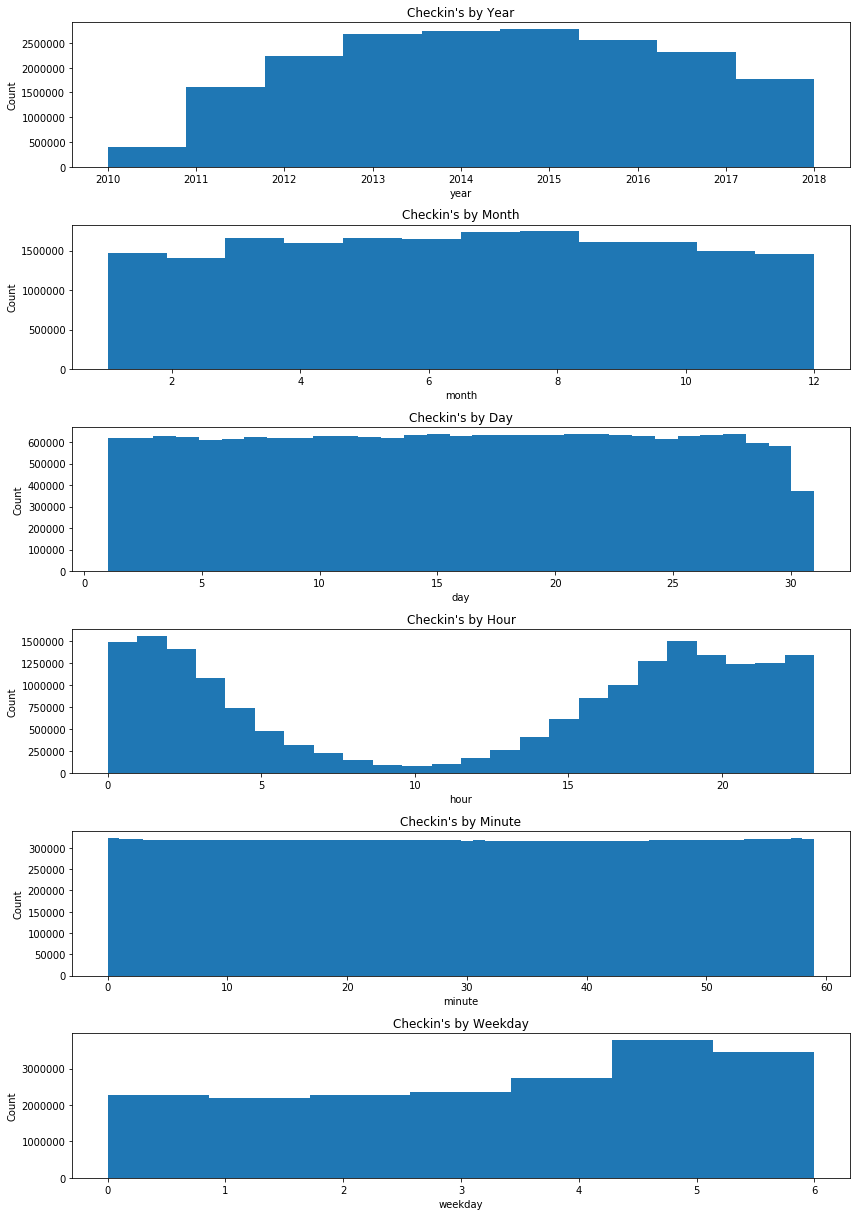

In [105]:
fig, axs = plt.subplots(6, 1, figsize=(12,17), tight_layout = True)
col = ['year', 'month', 'day', 'hour', 'minute', 'weekday']
bins = [9, 12, 31, 24, 60, 7]
x_labels = ['year', 'month', 'day', 'hour', 'minute', 'weekday']
y_labels = ['Count', 'Count', 'Count', 'Count', 'Count', 'Count']
titles = ["Checkin's by Year"
         , "Checkin's by Month"
         , "Checkin's by Day"
         , "Checkin's by Hour"
         , "Checkin's by Minute"
         , "Checkin's by Weekday"]
for i, ax in zip(col, axs.flatten()):
    ax.hist(date_time[i], bins = bins[col.index(i)])
    ax.set_xlabel(x_labels[col.index(i)])
    ax.set_ylabel(y_labels[col.index(i)])
    ax.set_title(titles[col.index(i)]);

In [80]:
col = ['year', 'month', 'day', 'hour', 'minute']
bins = [18, 12, 31, 24, 60]

In [81]:
col.index('year')

0